In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 20.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
df=pd.read_csv('USA.csv')
df=df.dropna()
df.set_index('date', inplace=True)
print('Shape of data',df.shape)
df.iloc[:,0:5]

Shape of data (819, 14)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index
date,,,,,
7/15/2020,197.013,2.858,1.13,0.0,68.98
7/16/2020,210.135,2.887,1.11,0.0,68.98
7/17/2020,196.868,2.733,1.10,0.0,68.98
7/18/2020,190.782,2.638,1.09,0.0,68.98
7/19/2020,175.028,1.433,1.08,0.0,68.98
...,...,...,...,...,...
10/7/2022,217.809,1.166,0.86,0.0,25.99
10/8/2022,22.659,0.139,0.86,0.0,25.99
10/9/2022,14.905,0.012,0.86,0.0,25.99


#Plot Your Data

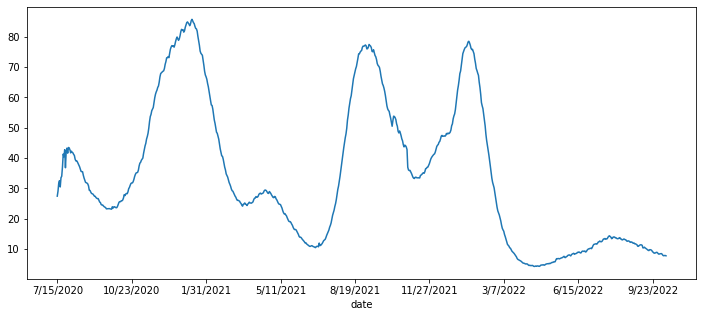

In [ ]:
df['icu_patients_per_million'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.677109189166949
2. P-Value :  0.07808382940608465
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 797
5. Critical Values :
	 1% :  -3.438581476199162
	 5% :  -2.865173218890781
	 10% :  -2.56870466056054


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,
                          suppress_warnings=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AIC=inf, Time=15.21 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=2160.340, Time=0.57 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AIC=1742.250, Time=1.93 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=1838.640, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=2158.919, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[14] intercept   : AIC=1829.572, Time=0.67 sec
 ARIMA(1,1,0)(2,0,0)[14] intercept   : AIC=1744.009, Time=4.94 sec
 ARIMA(1,1,0)(1,0,1)[14] intercept   : AIC=1744.085, Time=2.93 sec
 ARIMA(1,1,0)(0,0,1)[14] intercept   : AIC=1767.807, Time=0.84 sec
 ARIMA(1,1,0)(2,0,1)[14] intercept   : AIC=1744.642, Time=6.22 sec
 ARIMA(0,1,0)(1,0,0)[14] intercept   : AIC=1869.709, Time=0.82 sec
 ARIMA(2,1,0)(1,0,0)[14] intercept   : AIC=1606.158, Time=1.33 sec
 ARIMA(2,1,0)(0,0,0)[14] intercept   : AIC=1708.086, Time=0.42 sec
 ARIMA(2,1,0)(2,0,0)[14] intercept   : AIC=1592.344, Time=4.52 sec
 ARIMA(2,1,0)(2,0,1)[14

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  819
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 14)   Log Likelihood                -699.325
Date:                            Tue, 29 Nov 2022   AIC                           1418.649
Time:                                    23:54:56   BIC                           1465.718
Sample:                                07-15-2020   HQIC                          1436.712
                                     - 10-11-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.002      0.201      0.841      -0.003       0.004
ar.L1          0.5614      0.050     11.237      0.000       0.463       0.659
ar.L2          0.2212      0.026      8.405      0.000       0.170       0.273
ar.L3         -0.0022      0.016     -0.134      0.894      -0.034       0.030
ar.L4         -0.0846      0.028     -3.020      0.003      -0.140      -0.030
ar.L5          0.2843      0.026     10.783      0.000       0.233       0.336
ma.L1         -0.4839      0.057     -8.502      0.000      -0.596      -0.372
ar.S.L14       0.9560      0.014     67.329      0.000       0.928       0.984
ma.S.L14      -0.8151      0.033    -24.477      0.000      -0.880      -0.750
sigma2         0.3186      0.007     45.524      0.000       0.305       0.332
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             32210.00
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#model=auto_arima(df['icu_patients'], start_p=0, start_q=0, d=0,max_p=5,max_q=5,max_d=5,start_P=0,D=0,start_Q=0, max_P=5, max_D=5, max_Q=5, seasonal= True, information_criteria='AIC' )
#model.summary()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-30,]
test=df.iloc[-30:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(819, 14)
(789, 14) (30, 14)


In [ ]:
ts=df['icu_patients_per_million']
ts

date
7/15/2020     27.433
7/16/2020     29.071
7/17/2020     31.751
7/18/2020     32.531
7/19/2020     30.466
               ...  
10/7/2022      7.875
10/8/2022      7.772
10/9/2022      7.852
10/10/2022     7.855
10/11/2022     7.757
Name: icu_patients_per_million, Length: 819, dtype: float64

In [ ]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(ts, model='additive')
#result.plot()
#plt.show()

## Train the Model

In [ ]:
model=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(5,1,1),seasonal_order=(1,0,1,30) )
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:         icu_patients_per_million   No. Observations:                  789
Model:             ARIMA(5, 1, 1)x(1, 0, 1, 30)   Log Likelihood                -741.403
Date:                          Wed, 30 Nov 2022   AIC                           1502.806
Time:                                  01:29:12   BIC                           1549.501
Sample:                              07-15-2020   HQIC                          1520.757
                                   - 09-11-2022                                         
Covariance Type:                            opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
new_cases_per_million     0.0003   8.04e-05      4.280      0.000       0.000       0.001
ar.L1                     0.3393      0.038      8.881      0.000       0.264       0.414
ar.L2                     0.1919      0.021      9.069      0.000       0.150       0.233
ar.L3                     0.0462      0.018      2.593      0.010       0.011       0.081
ar.L4                    -0.0917      0.021     -4.281      0.000      -0.134      -0.050
ar.L5                     0.3915      0.016     24.026      0.000       0.360       0.423
ma.L1                    -0.2881      0.044     -6.494      0.000      -0.375      -0.201
ar.S.L30                  0.0186      0.228      0.082      0.935      -0.428       0.465
ma.S.L30                 -0.2160      0.231     -0.935      0.350      -0.669       0.237
sigma2                    0.3581      0.006     55.144      0.000       0.345       0.371
===================================================================================
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):             22267.79
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(exog=test.iloc[:,0:1],start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

date
9/12/2022     10.337376
9/13/2022     10.267083
9/14/2022     10.236856
9/15/2022      9.866967
9/16/2022      9.767004
9/17/2022      9.557316
9/18/2022      9.497893
9/19/2022      9.506171
9/20/2022      9.334193
9/21/2022      9.278805
9/22/2022      9.171331
9/23/2022      9.122116
9/24/2022      8.937595
9/25/2022      8.816094
9/26/2022      8.805450
9/27/2022      8.769658
9/28/2022      8.730075
9/29/2022      8.702706
9/30/2022      8.577899
10/1/2022      8.503847
10/2/2022      8.457406
10/3/2022      8.519854
10/4/2022      8.470600
10/5/2022      8.388988
10/6/2022      8.293699
10/7/2022      8.254664
10/8/2022      8.130751
10/9/2022      8.108863
10/10/2022     8.237127
10/11/2022     8.218401
Name: predicted_mean, dtype: float64


In [ ]:
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

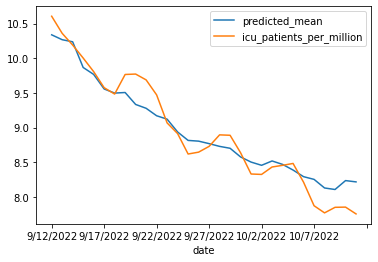

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)

In [ ]:
test['icu_patients_per_million'].mean()

8.9494

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)


0.22527205397031644


In [ ]:
model2=ARIMA(df['icu_patients_per_million'],order=(1,0,5),seasonal_order=(1,1,1,30))
model2=model2.fit()
df.tail()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
10/7/2022,217.809,1.166,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.875
10/8/2022,22.659,0.139,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.772
10/9/2022,14.905,0.012,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.852
10/10/2022,64.914,0.347,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.855
10/11/2022,143.746,1.730,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.757


#For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2022-04-24',end='2022-05-24')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

In [ ]:
pred.plot(figsize=(12,5),legend=True)
